<p style ='color:black;font-size:25px;text-align:center'><b>GRIP_THE_SPARKS_FOUNDATION_INTERNSHIP</b></p>
<br></br>
<p style='color:red;font-size:20px'><b><u>Problem statement: Predict optimum numbers of cluster present in iris data set and present it visually </u> </b></p>
<p style='color:black;font-size:15px'><b>Machine Learnig model used : unsupervised ml (clustering: kmeans)  </b></p>
<p style='color:black;font-size:15px'><b>Author:</b> Rahul Abhishek</p>



<p style='font-family:Sans-serif;font-size:20px;color:purple'>Importing basic lib  </p>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

<p style='font-family:Sans-serif;font-size:20px;color:purple'>Loading the data set </p>

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<p style='font-family:Sans-serif;font-size:20px;color:purple'>Preparing data set </p>

In [3]:
x=iris_df.iloc[:,[0,1,2,3]].values # consider first 4 columns 

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

<p style='font-family:Sans-serif;font-size:20px;color:purple'>understanding correlation between the features </p>

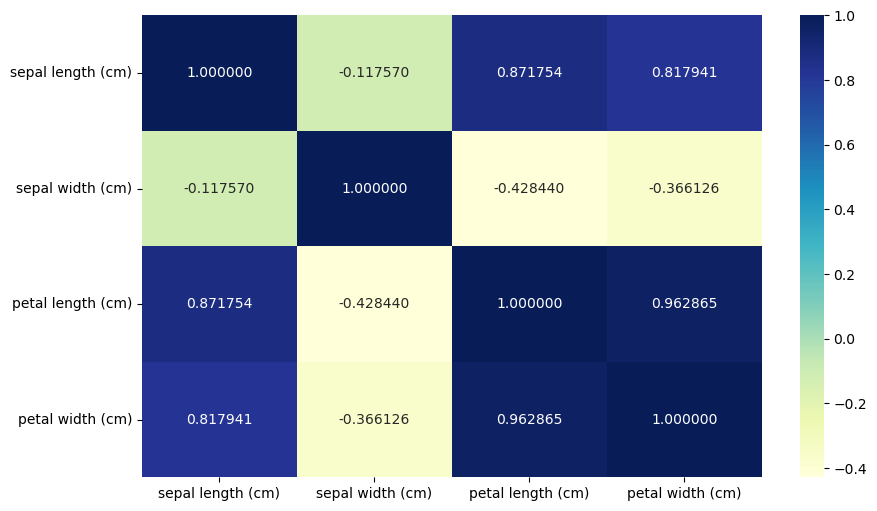

In [5]:
plt.figure(figsize=(10,6)) 
sns.heatmap(iris_df.corr(),annot=True,fmt="f",cmap="YlGnBu")
plt.show()


<p style='font-family:Sans-serif;font-size:20px;color:blue;text-align:justify'>from the above plot it is clear that there is a strong correlation between petal length and sepal length also betweem petal width and sepal length in addition to this we can see there is a correlation between petal length and petal width </p>

In [6]:
# importing necessery lib 
from sklearn.cluster import KMeans

<p style='font-family:Sans-serif;font-size:20px;color:blue;text-align:justify'>calculating within cluster sum of square in order to understandd which value of k should be take so that we can get least distance between data points and center of the cluster i.e more compact or data points are very close to each other within the cluster  </p>

In [7]:
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.44618205128206,
 39.03998724608725,
 34.420191786283894,
 30.06459307359308,
 28.332569264069267,
 25.972596377306903]

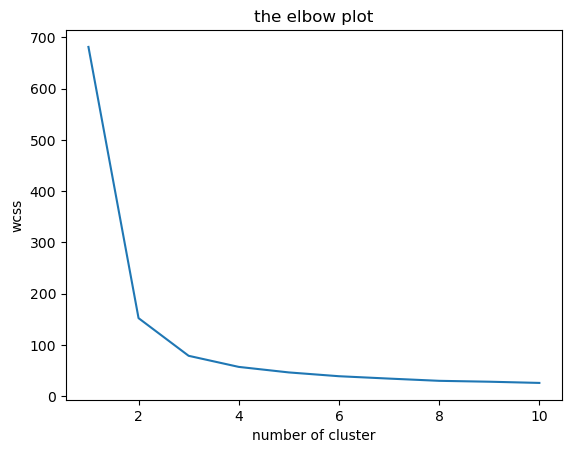

In [8]:
plt.plot(range(1,11),wcss)
plt.title('the elbow plot')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

<p style='font-family:Sans-serif;font-size:20px;color:blue'>from the above elbow plot it is quite clear that when we take k = 3 the data points within the cluster will be very close to each other   </p>

<p style='font-family:Sans-serif;font-size:20px;color:blue'> using silhouette score  we are confirming whether we got correct number of k from the elbow plot or not </p>

In [10]:
from yellowbrick.cluster import KElbowVisualizer

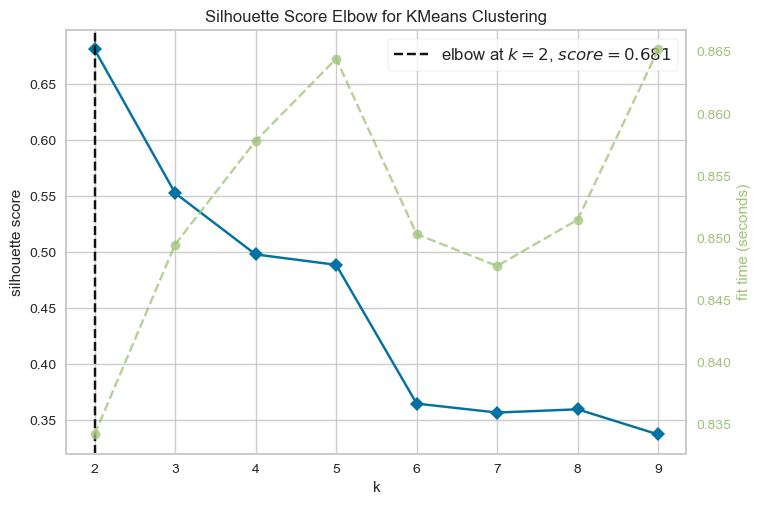

In [11]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(x)
visualizer.show()
plt.show()
# from the below plot we can conclude that we can take number of cliusters as 3 

<p style='font-family:Sans-serif;font-size:20px;color:purple'> preparing unsupervised(clustering algo) kmean algorithm  </p>

In [12]:
kmeans = KMeans(n_clusters =3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = iris_df.iloc[:, [0,1,2,3]].values
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
df_kmean = iris_df.copy()

In [14]:
label  = pd.DataFrame(y_kmeans, columns= ['label'])
label.head()

,label
0,1
1,1
2,1
3,1
4,1


In [15]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [16]:
df_kmean.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


In [17]:
df_kmean.label.value_counts()

0    62
1    50
2    38
Name: label, dtype: int64

<p style='font-family:Sans-serif;font-size:20px;color:blue'> we can see we have 3 clusters namely <ul style='font-size:20px;color:blue'><li>0 cluster: 62 data points</li><li>1 cluster: 50 data points</li><li>2 cluster: 38 data points</li></ul></p>

<p style='font-family:Sans-serif;font-size:20px;color:purple'> visualization of kmean clustering with 3 clusters   </p>

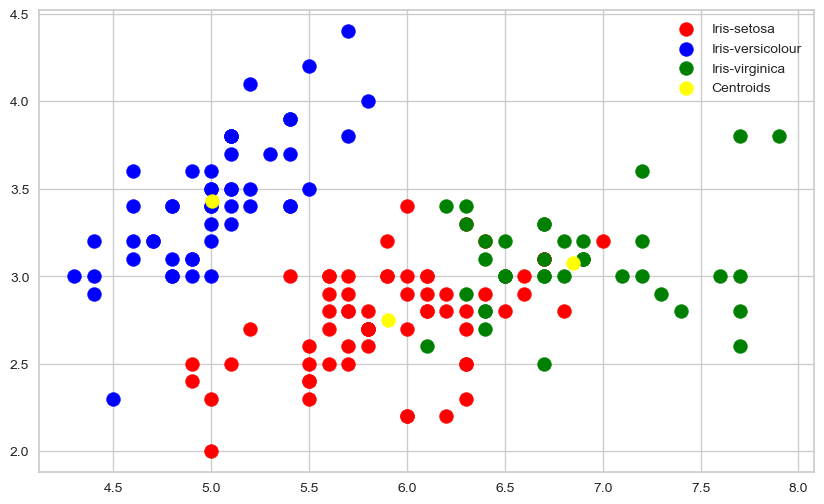

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()